In [1]:
import requests

r = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a")

In [2]:
from io import BytesIO
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file(f=BytesIO(r.content), n_features=123)
X = X.toarray()

In [3]:
import numpy

n_samples, n_features = X.shape
X = numpy.column_stack((X, numpy.ones((n_samples, 1))))
y = y.reshape((-1, 1))

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5)

In [5]:
max_epoch = 100
learning_rate = 0.001
C = 0.5

losses_train = []
losses_val = []

In [6]:
# w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
# w = numpy.random.normal(0.1, 0.1, size=(n_features + 1, 1))  # initialize with zero normal distribution

In [7]:
for epoch in range(max_epoch):
    h = 1 - y_train * numpy.dot(X_train, w)
    y_hat = numpy.where(h > 0, y_train, 0)
    w -= learning_rate * (w - C * numpy.dot(X_train.transpose(), y_hat))

    y_predict_train = numpy.where(numpy.dot(X_train, w) > 0, 1, -1)
    loss_train = numpy.sum(w * w) + C * numpy.sum(numpy.maximum(1 - y_train * numpy.dot(X_train, w), 0))
    losses_train.append(loss_train / y_train.size)

    y_predict_val = numpy.where(numpy.dot(X_val, w) > 0, 1, -1)
    loss_val = numpy.sum(w * w) + C * numpy.sum(numpy.maximum(1 - y_val * numpy.dot(X_val, w), 0))
    losses_val.append(loss_val/y_val.size)

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_val, numpy.where(numpy.dot(X_val, w) > 0, 1, -1),
                            target_names=["positive", "negative"], digits=4))

              precision    recall  f1-score   support

    positive     0.8036    0.9909    0.8875     12450
    negative     0.8784    0.2130    0.3429      3831

    accuracy                         0.8079     16281
   macro avg     0.8410    0.6020    0.6152     16281
weighted avg     0.8212    0.8079    0.7593     16281



Text(0.5, 1.0, 'The graph of loss value varing with the number of iterations')

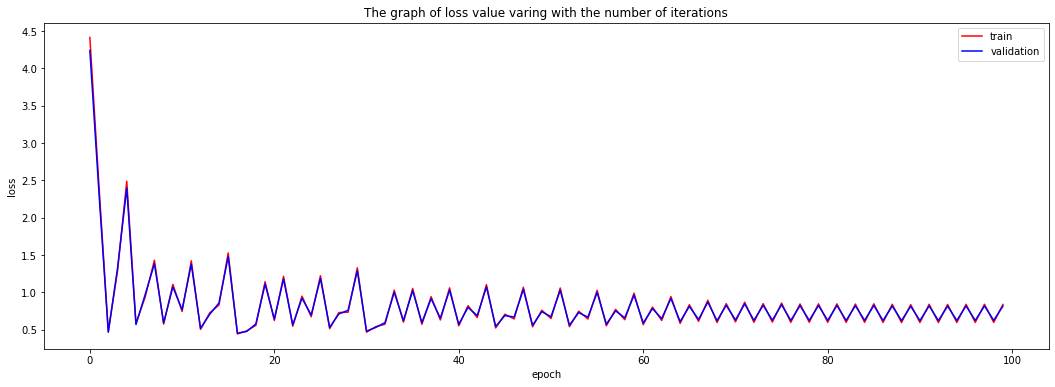

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, color="r", label="train")
plt.plot(losses_val, color="b", label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of loss value varing with the number of iterations")